In [22]:
%matplotlib inline
import pandas as pd
import sklearn.cluster
import matplotlib.pyplot as plt

In [2]:
sac = pd.read_csv('data/sacramento_real_estate_transactions.csv')
sac.sample(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
571,100 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.886091,-121.289744
405,5217 ARGO WAY,SACRAMENTO,95820,CA,3,1,1039,Residential,Mon May 19 00:00:00 EDT 2008,168000,38.527740,-121.433669
295,411 ILLSLEY WAY,FOLSOM,95630,CA,4,2,1595,Residential,Tue May 20 00:00:00 EDT 2008,339000,38.652002,-121.129504
91,8636 TEGEA WAY,ELK GROVE,95624,CA,5,3,2508,Residential,Wed May 21 00:00:00 EDT 2008,245918,38.443832,-121.382087
361,8101 PORT ROYALE WAY,SACRAMENTO,95823,CA,2,1,779,Residential,Mon May 19 00:00:00 EDT 2008,114750,38.463929,-121.438667
332,4128 HILL ST,FAIR OAKS,95628,CA,5,5,2846,Residential,Tue May 20 00:00:00 EDT 2008,680000,38.641670,-121.262099
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
384,2421 SANTINA WAY,ELVERTA,95626,CA,3,2,1416,Residential,Mon May 19 00:00:00 EDT 2008,140000,38.718650,-121.407763
76,9080 FRESCA WAY,ELK GROVE,95758,CA,4,2,1596,Residential,Wed May 21 00:00:00 EDT 2008,221000,38.427818,-121.424026
463,1316 I ST,RIO LINDA,95673,CA,3,1,1160,Residential,Mon May 19 00:00:00 EDT 2008,249862,38.683674,-121.435204


In [3]:
kmeans = sklearn.cluster.KMeans(n_clusters=2)
kmeans.fit(sac[['latitude', 'longitude']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
sac['two_cluster_id'] = kmeans.labels_

In [5]:
sac.two_cluster_id.value_counts()

0    984
1      1
Name: two_cluster_id, dtype: int64

In [6]:
sac[sac.two_cluster_id == 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,two_cluster_id
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433,1


In [7]:
kmeans.cluster_centers_

array([[  38.6076704 , -121.35583235],
       [-121.503471  ,   38.668433  ]])

In [8]:
sac.dtypes

street             object
city               object
zip                 int64
state              object
beds                int64
baths               int64
sq__ft              int64
type               object
sale_date          object
price               int64
latitude          float64
longitude         float64
two_cluster_id      int32
dtype: object

# What if we clustered on all numeric fields? 

Would we still see outliers?

In [9]:
import sklearn.preprocessing

In [10]:
scaler = sklearn.preprocessing.StandardScaler()
scaled = scaler.fit_transform(sac[['zip', 'beds', 'baths', 'sq__ft', 'price', 'latitude', 'longitude']])

In [11]:
scaled.shape

(985, 7)

In [12]:
outlier_kmeans = sklearn.cluster.KMeans(n_clusters=2)
outlier_kmeans.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
sac['outlier_cluster_id'] = outlier_kmeans.labels_

In [14]:
sac.outlier_cluster_id.value_counts()

0    984
1      1
Name: outlier_cluster_id, dtype: int64

# How many cluster to form?

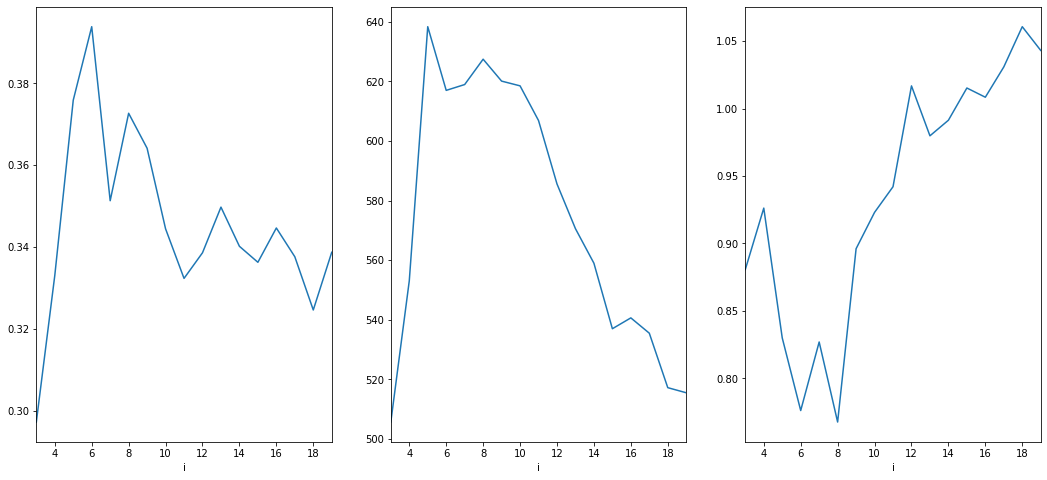

In [26]:
import sklearn.metrics

scores = []
for i in range(3,20):
    kmeans = sklearn.cluster.KMeans(n_clusters=i)
    kmeans.fit(scaled)
    scores.append(
        {'silhouette': sklearn.metrics.silhouette_score(scaled, kmeans.labels_),
         'ch' : sklearn.metrics.calinski_harabasz_score(scaled, kmeans.labels_),
         'db' : sklearn.metrics.davies_bouldin_score(scaled, kmeans.labels_),
         'i': i}
    )
scores_df = pd.DataFrame.from_records(scores).set_index('i')

fig, ax = plt.subplots(ncols=3, figsize=(18,8))
scores_df.silhouette.plot(ax=ax[0])
scores_df.ch.plot(ax=ax[1])
scores_df.db.plot(ax=ax[2])

In [24]:
kmeans = sklearn.cluster.KMeans(n_clusters=4)
kmeans.fit(scaled)
sac['four_cluster_id'] = kmeans.labels_

In [25]:
kmeans = sklearn.cluster.KMeans(n_clusters=5)
kmeans.fit(scaled)
sac['five_cluster_id'] = kmeans.labels_

In [27]:
kmeans = sklearn.cluster.KMeans(n_clusters=6)
kmeans.fit(scaled)
sac['six_cluster_id'] = kmeans.labels_

In [28]:
sac.six_cluster_id.value_counts()

4    434
5    227
3    167
1    110
0     46
2      1
Name: six_cluster_id, dtype: int64

In [29]:
sac[sac.six_cluster_id == 2]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,two_cluster_id,outlier_cluster_id,four_cluster_id,five_cluster_id,six_cluster_id
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433,1,1,3,2,2


In [30]:
sac[sac.six_cluster_id == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,two_cluster_id,outlier_cluster_id,four_cluster_id,five_cluster_id,six_cluster_id
132,3020 RICHARDSON CIR,EL DORADO HILLS,95762,CA,3,2,0,Residential,Wed May 21 00:00:00 EDT 2008,352000,38.691299,-121.081752,0,0,2,0,0
154,6030 PALERMO WAY,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,600000,38.672761,-121.050378,0,0,0,4,0
155,4070 REDONDO DR,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,606238,38.666807,-121.064830,0,0,0,4,0
157,315 JUMEL CT,EL DORADO HILLS,95762,CA,6,5,0,Residential,Wed May 21 00:00:00 EDT 2008,830000,38.669931,-121.059580,0,0,0,4,0
278,1102 CHESLEY LN,LINCOLN,95648,CA,4,4,0,Residential,Tue May 20 00:00:00 EDT 2008,297500,38.864864,-121.313988,0,0,0,0,0
287,1312 RENISON LN,LINCOLN,95648,CA,5,3,0,Residential,Tue May 20 00:00:00 EDT 2008,315000,38.866409,-121.308485,0,0,0,0,0
302,5924 TANUS CIR,ROCKLIN,95677,CA,4,2,0,Residential,Tue May 20 00:00:00 EDT 2008,380000,38.778691,-121.204292,0,0,2,0,0
311,1456 EAGLESFIELD LN,LINCOLN,95648,CA,4,3,0,Residential,Tue May 20 00:00:00 EDT 2008,436746,38.857635,-121.311375,0,0,0,0,0
312,4100 BOTHWELL CIR,EL DORADO HILLS,95762,CA,5,3,0,Residential,Tue May 20 00:00:00 EDT 2008,438700,38.679136,-121.034329,0,0,0,4,0
316,1032 SOUZA DR,EL DORADO HILLS,95762,CA,3,2,0,Residential,Tue May 20 00:00:00 EDT 2008,460000,38.668239,-121.064437,0,0,2,0,0


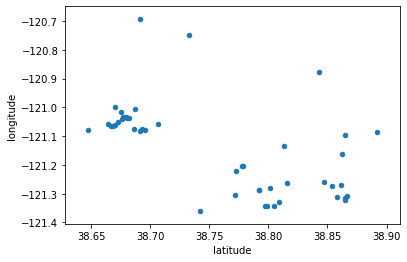

In [31]:
sac[sac.six_cluster_id == 0].plot.scatter(x='latitude', y='longitude')

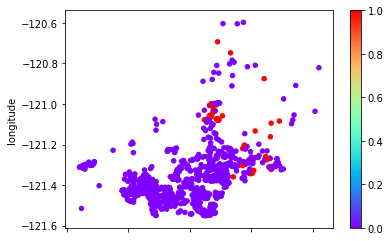

In [36]:
sac[sac.six_cluster_id != 2].plot.scatter(x='latitude', y='longitude', c=(sac[sac.six_cluster_id != 2].six_cluster_id == 0), cmap='rainbow')

In [38]:
sac[sac.six_cluster_id == 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,two_cluster_id,outlier_cluster_id,four_cluster_id,five_cluster_id,six_cluster_id
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880,0,0,1,3,1
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970,0,0,1,3,1
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141,0,0,1,3,1
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600,0,0,1,3,1
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965,0,0,1,3,1
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500,0,0,1,3,1
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757,0,0,1,3,1
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727,0,0,1,3,1
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032,0,0,1,3,1
171,5201 LAGUNA OAKS DR Unit 199,ELK GROVE,95758,CA,1,1,722,Condo,Tue May 20 00:00:00 EDT 2008,98000,38.423251,-121.444489,0,0,1,3,1


In [39]:
sac[sac.six_cluster_id == 3]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,two_cluster_id,outlier_cluster_id,four_cluster_id,five_cluster_id,six_cluster_id
68,7624 BOGEY CT,SACRAMENTO,95828,CA,4,4,2162,Multi-Family,Wed May 21 00:00:00 EDT 2008,195000,38.480090,-121.415102,0,0,0,4,3
78,8373 BLACKMAN WAY,ELK GROVE,95624,CA,5,3,2136,Residential,Wed May 21 00:00:00 EDT 2008,223058,38.435436,-121.394536,0,0,0,4,3
84,9186 KINBRACE CT,SACRAMENTO,95829,CA,4,3,2235,Residential,Wed May 21 00:00:00 EDT 2008,236685,38.463355,-121.358936,0,0,0,4,3
91,8636 TEGEA WAY,ELK GROVE,95624,CA,5,3,2508,Residential,Wed May 21 00:00:00 EDT 2008,245918,38.443832,-121.382087,0,0,0,4,3
97,5529 LAGUNA PARK DR,ELK GROVE,95758,CA,5,3,2790,Residential,Wed May 21 00:00:00 EDT 2008,258000,38.425680,-121.438062,0,0,0,4,3
104,7842 LAHONTAN CT,SACRAMENTO,95829,CA,4,3,2372,Residential,Wed May 21 00:00:00 EDT 2008,273750,38.472976,-121.318633,0,0,0,4,3
107,2064 EXPEDITION WAY,SACRAMENTO,95832,CA,4,3,3009,Residential,Wed May 21 00:00:00 EDT 2008,280987,38.474099,-121.490711,0,0,0,4,3
108,2912 NORCADE CIR,SACRAMENTO,95826,CA,8,4,3612,Multi-Family,Wed May 21 00:00:00 EDT 2008,282400,38.559505,-121.364839,0,0,0,4,3
109,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043,0,0,0,4,3
113,10158 CRAWFORD WAY,SACRAMENTO,95827,CA,4,4,2213,Multi-Family,Wed May 21 00:00:00 EDT 2008,297000,38.570300,-121.315735,0,0,0,4,3


In [40]:
import sklearn.tree

In [41]:
dtc = sklearn.tree.DecisionTreeClassifier()
features = ['zip', 'beds', 'baths', 'sq__ft', 'price', 'latitude', 'longitude']
dtc.fit(sac[features], sac.six_cluster_id)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
print(sklearn.tree.export_graphviz(dtc, feature_names=features))

digraph Tree {
node [shape=box] ;
0 [label="zip <= 95746.5\ngini = 0.709\nsamples = 985\nvalue = [46, 110, 1, 167, 434, 227]"] ;
1 [label="beds <= 1.0\ngini = 0.577\nsamples = 379\nvalue = [22, 76, 0, 54, 0, 227]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 76\nvalue = [0, 76, 0, 0, 0, 0]"] ;
1 -> 2 ;
3 [label="sq__ft <= 2196.5\ngini = 0.402\nsamples = 303\nvalue = [22, 0, 0, 54, 0, 227]"] ;
1 -> 3 ;
4 [label="price <= 411000.0\ngini = 0.22\nsamples = 254\nvalue = [22, 0, 0, 9, 0, 223]"] ;
3 -> 4 ;
5 [label="baths <= 2.5\ngini = 0.128\nsamples = 237\nvalue = [10, 0, 0, 6, 0, 221]"] ;
4 -> 5 ;
6 [label="sq__ft <= 390.0\ngini = 0.052\nsamples = 223\nvalue = [6, 0, 0, 0, 0, 217]"] ;
5 -> 6 ;
7 [label="price <= 300000.0\ngini = 0.397\nsamples = 22\nvalue = [6, 0, 0, 0, 0, 16]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 15\nvalue = [0, 0, 0, 0, 0, 15]"] ;
7 -> 8 ;
9 [label="beds <= 2.5\ngini = 0.245\nsamples = 7\nvalue = [6, 0, 0, 0, 0, 

# DBScan

In [49]:
dbscan = sklearn.cluster.DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(sac[['latitude', 'longitude', 'beds']])
sac['dbscan_cluster_id'] = dbscan.labels_

In [50]:
sac.dbscan_cluster_id.value_counts()

 1     374
 3     234
-1     105
 0      82
 12     62
 2      34
 6      13
 5      13
 4      11
 9      10
 11      8
 8       8
 10      7
 7       7
 15      6
 14      6
 13      5
Name: dbscan_cluster_id, dtype: int64

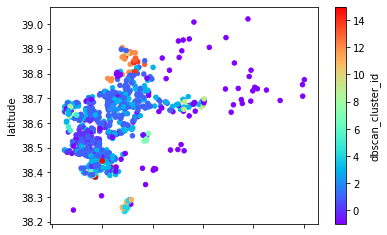

In [51]:
sac[sac.six_cluster_id != 2].plot.scatter(x='longitude', y='latitude', c='dbscan_cluster_id', cmap='rainbow')

In [52]:
sac[sac.dbscan_cluster_id == 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,two_cluster_id,outlier_cluster_id,four_cluster_id,five_cluster_id,six_cluster_id,dbscan_cluster_id
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,2,1,4,1
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,0,0,2,1,4,1
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,0,0,2,1,4,1
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,0,0,2,1,4,1
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,0,0,2,0,5,1
10,645 MORRISON AVE,SACRAMENTO,95838,CA,3,2,909,Residential,Wed May 21 00:00:00 EDT 2008,100309,38.637663,-121.451520,0,0,2,1,4,1
11,4085 FAWN CIR,SACRAMENTO,95823,CA,3,2,1289,Residential,Wed May 21 00:00:00 EDT 2008,106250,38.470746,-121.458918,0,0,2,1,4,1
13,2113 KIRK WAY,SACRAMENTO,95822,CA,3,1,1020,Residential,Wed May 21 00:00:00 EDT 2008,107502,38.482215,-121.492603,0,0,2,1,4,1
19,113 LEEWILL AVE,RIO LINDA,95673,CA,3,2,1356,Residential,Wed May 21 00:00:00 EDT 2008,121630,38.689999,-121.463220,0,0,2,0,5,1
20,6118 STONEHAND AVE,CITRUS HEIGHTS,95621,CA,3,2,1118,Residential,Wed May 21 00:00:00 EDT 2008,122000,38.707851,-121.320707,0,0,2,0,5,1


In [53]:
sac[sac.dbscan_cluster_id == 3]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,two_cluster_id,outlier_cluster_id,four_cluster_id,five_cluster_id,six_cluster_id,dbscan_cluster_id
21,4882 BANDALIN WAY,SACRAMENTO,95823,CA,4,2,1329,Residential,Wed May 21 00:00:00 EDT 2008,122682,38.468173,-121.444071,0,0,2,1,4,3
22,7511 OAKVALE CT,NORTH HIGHLANDS,95660,CA,4,2,1240,Residential,Wed May 21 00:00:00 EDT 2008,123000,38.702792,-121.382210,0,0,2,0,5,3
28,9861 CULP WAY,SACRAMENTO,95827,CA,4,2,1380,Residential,Wed May 21 00:00:00 EDT 2008,131200,38.558423,-121.327948,0,0,2,1,4,3
37,7661 NIXOS WAY,SACRAMENTO,95823,CA,4,2,1472,Residential,Wed May 21 00:00:00 EDT 2008,148750,38.479553,-121.463317,0,0,2,1,4,3
38,7044 CARTHY WAY,SACRAMENTO,95828,CA,4,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,149593,38.498570,-121.420925,0,0,2,1,4,3
44,7315 KOALA CT,NORTH HIGHLANDS,95660,CA,4,2,1587,Residential,Wed May 21 00:00:00 EDT 2008,161500,38.699251,-121.371414,0,0,2,0,5,3
45,2622 ERIN DR,SACRAMENTO,95833,CA,4,1,1120,Residential,Wed May 21 00:00:00 EDT 2008,164000,38.613765,-121.488694,0,0,2,1,4,3
46,8421 SUNBLAZE WAY,SACRAMENTO,95823,CA,4,2,1580,Residential,Wed May 21 00:00:00 EDT 2008,165000,38.450543,-121.432538,0,0,2,1,4,3
47,7420 ALIX PKWY,SACRAMENTO,95823,CA,4,1,1955,Residential,Wed May 21 00:00:00 EDT 2008,166357,38.489405,-121.452811,0,0,2,1,4,3
48,3820 NATOMA WAY,SACRAMENTO,95838,CA,4,2,1656,Residential,Wed May 21 00:00:00 EDT 2008,166357,38.636748,-121.422159,0,0,2,1,4,3


In [56]:
dbscan = sklearn.cluster.DBSCAN()
dbscan.fit(scaled)
sac['scaled_db_cluster_id'] = dbscan.labels_

In [57]:
sac.scaled_db_cluster_id.value_counts()

-1     220
 2     155
 3      92
 7      90
 0      59
 1      50
 23     47
 8      44
 11     32
 9      27
 10     22
 5      20
 14     19
 12     15
 13     13
 6      13
 16     12
 19      7
 15      7
 4       7
 17      7
 18      6
 20      6
 24      5
 21      5
 22      5
Name: scaled_db_cluster_id, dtype: int64

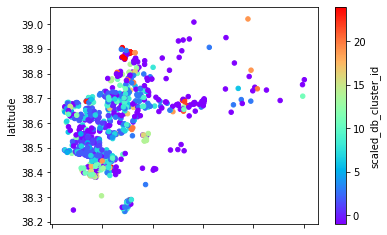

In [58]:
sac[sac.six_cluster_id != 2].plot.scatter(x='longitude', y='latitude', c='scaled_db_cluster_id', cmap='rainbow')

In [59]:
sac[sac.scaled_db_cluster_id == 2]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,two_cluster_id,outlier_cluster_id,four_cluster_id,five_cluster_id,six_cluster_id,dbscan_cluster_id,scaled_db_cluster_id
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,0,0,2,1,4,1,2
10,645 MORRISON AVE,SACRAMENTO,95838,CA,3,2,909,Residential,Wed May 21 00:00:00 EDT 2008,100309,38.637663,-121.451520,0,0,2,1,4,1,2
11,4085 FAWN CIR,SACRAMENTO,95823,CA,3,2,1289,Residential,Wed May 21 00:00:00 EDT 2008,106250,38.470746,-121.458918,0,0,2,1,4,1,2
23,9 PASTURE CT,SACRAMENTO,95834,CA,3,2,1601,Residential,Wed May 21 00:00:00 EDT 2008,124100,38.628631,-121.488097,0,0,2,1,4,1,2
25,3828 BLACKFOOT WAY,ANTELOPE,95843,CA,3,2,1088,Residential,Wed May 21 00:00:00 EDT 2008,126640,38.709740,-121.373770,0,0,2,1,4,1,2
27,1469 JANRICK AVE,SACRAMENTO,95832,CA,3,2,1119,Residential,Wed May 21 00:00:00 EDT 2008,129000,38.476472,-121.501711,0,0,2,1,4,1,2
29,7825 CREEK VALLEY CIR,SACRAMENTO,95828,CA,3,2,1248,Residential,Wed May 21 00:00:00 EDT 2008,132000,38.472122,-121.404199,0,0,2,1,4,1,2
32,3100 EXPLORER DR,SACRAMENTO,95827,CA,3,2,1380,Residential,Wed May 21 00:00:00 EDT 2008,136500,38.566663,-121.332644,0,0,2,1,4,1,2
35,3920 SHINING STAR DR,SACRAMENTO,95823,CA,3,2,1418,Residential,Wed May 21 00:00:00 EDT 2008,146250,38.487420,-121.462459,0,0,2,1,4,1,2
41,2178 63RD AVE,SACRAMENTO,95822,CA,3,2,1207,Residential,Wed May 21 00:00:00 EDT 2008,154000,38.493955,-121.489660,0,0,2,1,4,1,2


In [60]:
sac.groupby('scaled_db_cluster_id').price.mean()

scaled_db_cluster_id
-1     371827.877273
 0     116815.661017
 1     150780.800000
 2     188260.870968
 3     219331.543478
 4      98216.857143
 5     147079.050000
 6     124308.692308
 7     210711.844444
 8     236654.795455
 9     176140.518519
 10    240734.454545
 11    235746.562500
 12    287483.666667
 13    260693.153846
 14    326131.578947
 15    293153.428571
 16    355456.250000
 17    140879.285714
 18    168616.166667
 19    224402.571429
 20    324333.333333
 21    472840.000000
 22    405640.000000
 23      5431.106383
 24    404500.000000
Name: price, dtype: float64

# Example of using clustering as a feature

In [69]:
features = ['beds', 'baths', 'sq__ft', 'latitude', 'longitude']
scaler = sklearn.preprocessing.StandardScaler()
scaled = scaler.fit_transform(sac[features])
scaled_df = pd.DataFrame(data=scaled, columns=features)

In [79]:
(Xtrain, Xtest, Ytrain, Ytest) = sklearn.model_selection.train_test_split(scaled_df, sac.price)
kmeans = sklearn.cluster.KMeans(n_clusters=6)
kmeans.fit(Xtrain)
X_df = Xtrain.merge(pd.get_dummies(kmeans.labels_, prefix="cluster"), left_index=True, right_index=True, how='outer')

In [83]:
pd.get_dummies?

In [82]:
huber = sklearn.linear_model.HuberRegressor()
huber.fit(X_df, Ytrain)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

array([4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 5, 5, 4, 5, 5, 4,
       5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4,
       5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 5, 5, 5, 4, 4,
       4, 4, 3, 4, 5, 5, 5, 1, 4, 4, 4, 4, 3, 5, 4, 5, 5, 4, 3, 5, 5, 4,
       4, 1, 4, 3, 5, 4, 5, 4, 4, 3, 4, 4, 1, 4, 5, 4, 3, 4, 5, 3, 3, 3,
       5, 4, 4, 3, 3, 4, 5, 3, 5, 3, 3, 1, 3, 5, 3, 3, 1, 5, 3, 3, 3, 3,
       0, 1, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1,
       0, 0, 3, 0, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 5, 4,
       5, 4, 5, 4, 4, 5, 4, 5, 5, 4, 4, 4, 4, 5, 5, 4, 1, 4, 4, 4, 5, 4,
       4, 4, 4, 4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 5,
       5, 4, 4, 5, 5, 4, 4, 5, 3, 4, 5, 5, 5, 5, 1, 4, 1, 4, 4, 5, 4, 5,
       5, 5, 4, 4, 4, 4, 1, 1, 4, 3, 4, 1, 5, 5, 5, 4, 3, 4, 4, 4, 5, 4,
       3, 1, 3, 4, 1, 5, 3, 3, 5, 3, 4, 5, 5, 4, 0, 1, 5, 3, 5, 4, 5, 1,
       1, 0, 3, 5, 5, 3, 4, 3, 4, 5, 5, 3, 5, 3, 3,